# Homework 4: Can you predict the Midterm Elections?

Due: Monday, November 3, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW4.ipynb download=HW4.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work. For the competition (problem 4), we will post a link on Piazza to a Google Form for you to submit your predictions. 


---


## Introduction

**Add Introduction**

You will use the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to extract the polls for the current 2014 Senate Midterm Elections and provide a final prediction of the result of each state.

#### Data

We will use the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api). 

---

## Problem 1: Data Wrangling

We will read in the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) and create a dictionary of DataFrames as well a master table information for each race.

#### Problem 1(a)

Read in [this JSON object](http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate) containing the polls for the 2014 Senate Elections using the HuffPost API. Call this JSON object `info`.  This JSON object is imported as a list in Python where each element contains the information for one race.  Use the function `type` to confirm the that `info` is a list. 

In [186]:
import io
import json, requests
import pandas as pd
import numpy as np
url = 'http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate'
js = requests.get(url).json()

In [187]:
print([s['state'] for s in js])

['DE', 'MA', 'RI', 'MT', 'OK', 'HI', 'KS', 'WY', 'TN', 'ID', 'NJ', 'NM', 'OK', 'SC', 'SC', 'TX', 'MN', 'ME', 'SD', 'NE', 'GA', 'OR', 'MS', 'IA', 'AK', 'IL', 'CO', 'VA', 'NC', 'NH', 'WV', 'NH', 'LA', 'MI', 'AR', 'KY']


In [188]:
res = []
cols = ['title', 'short_title', 'last_updated', 'slug', 'url', 'election_date', 
        'poll_count', 'state', 'id', 'topic'] + ['choice', 'last_name', 'lead_confidence', 'value', 
                                                 'party', 'first_name', 'incumbent']
for s in js:
    sealed_keys = [k for k in s.keys() if k != 'estimates']    
    estimations = s['estimates']    
    if estimations == []:
        res.append([s[k] for k in sealed_keys] + [np.nan] * 7)
    for est in estimations:
        #print(list(est.values()))
        l = [s[k] for k in sealed_keys] + list(est.values())
        res.append(l)
        
df = pd.DataFrame(res, columns = cols)
df

,title,short_title,last_updated,slug,url,election_date,poll_count,state,id,topic,choice,last_name,lead_confidence,value,party,first_name,incumbent
0,2014 Delaware Senate: Wade vs. Coons,2014 Delaware Senate: Wade vs. Coons,2016-06-06T14:37:54.000Z,2014-delaware-senate-wade-vs-coons,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,5,DE,571,2014-senate,Coons,Coons,99.9,56.00,Dem,Chris,True
1,2014 Delaware Senate: Wade vs. Coons,2014 Delaware Senate: Wade vs. Coons,2016-06-06T14:37:54.000Z,2014-delaware-senate-wade-vs-coons,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,5,DE,571,2014-senate,Wade,Wade,0.0,34.00,Rep,Kevin,False
2,2014 Massachusetts Senate: Herr vs. Markey,2014 Massachusetts Senate: Herr vs. Markey,2016-06-06T14:37:55.000Z,2014-massachusetts-senate-herr-vs-markey,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,13,MA,570,2014-senate,Markey,Markey,99.9,54.10,Dem,Ed,True
3,2014 Massachusetts Senate: Herr vs. Markey,2014 Massachusetts Senate: Herr vs. Markey,2016-06-06T14:37:55.000Z,2014-massachusetts-senate-herr-vs-markey,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,13,MA,570,2014-senate,Herr,Herr,0.0,33.40,Rep,Brian,False
4,2014 Massachusetts Senate: Herr vs. Markey,2014 Massachusetts Senate: Herr vs. Markey,2016-06-06T14:37:55.000Z,2014-massachusetts-senate-herr-vs-markey,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,13,MA,570,2014-senate,Other,None,NaN,0.18,N/A,None,False
5,2014 Rhode Island Senate: Zaccaria vs. Reed,2014 Rhode Island Senate: Zaccaria vs. Reed,2016-06-06T14:37:55.000Z,2014-rhode-island-senate-zaccaria-vs-reed,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,4,RI,569,2014-senate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014 Montana Senate: Daines vs. Curtis,2014 Montana Senate: Daines vs. Curtis,2016-06-06T14:37:56.000Z,2014-montana-senate-daines-vs-curtis,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,7,MT,568,2014-senate,Daines,Daines,99.9,53.80,Rep,Steve,False
7,2014 Montana Senate: Daines vs. Curtis,2014 Montana Senate: Daines vs. Curtis,2016-06-06T14:37:56.000Z,2014-montana-senate-daines-vs-curtis,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,7,MT,568,2014-senate,Curtis,Curtis,0.0,36.10,Dem,Amanda,False
8,2014 Oklahoma Senate: Lankford vs. Johnson,2014 Oklahoma Senate: Lankford vs. Johnson,2016-06-06T14:37:56.000Z,2014-oklahoma-senate-lankford-vs-johnson,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,8,OK,567,2014-senate,Lankford,Lankford,100.0,62.40,Rep,James,False
9,2014 Oklahoma Senate: Lankford vs. Johnson,2014 Oklahoma Senate: Lankford vs. Johnson,2016-06-06T14:37:56.000Z,2014-oklahoma-senate-lankford-vs-johnson,http://elections.huffingtonpost.com/pollster/2...,2014-11-04,8,OK,567,2014-senate,Johnson,Johnson,0.0,28.60,Dem,Connie,False


#### Problem 1(b)

For each element of the list in `info` extract the state. We should have one poll per state, but we do not. Why?

**Hint**: Use the internet to find out information on the races in each state that has more than one entry. Eliminate entries of the list that represent races that are not happening.

In [189]:
cols = ['title', 'election_date', 'poll_count', 'state', 'id', 'topic', 'choice', 'first_name', 'last_name', 'party', 
        'lead_confidence', 'value', 'incumbent']
npolls = df.groupby('state').title.unique()
polls2 = npolls[npolls.apply(lambda x: len(x) > 1)]

In [190]:
df = df[(df.title.apply(lambda x: ('Bass' not in x)))].dropna(subset=['last_name'])

** Your answer here: **

There were two elections in [Oklahoma](https://en.wikipedia.org/wiki/United_States_Senate_special_election_in_Oklahoma,_2014) and [South Carolina](https://en.wikipedia.org/wiki/United_States_Senate_special_election_in_South_Carolina,_2014) because of resign of two previously elected members (Tom Coburn and Jim DeMint). In Hew Hampshire Bass withdrawed.

#### Problem 1(c)

Create a dictionary of pandas DataFrames called `polls` keyed by the name of the election (a string). Each value in the dictionary should contain the polls for one of the races.

In [191]:
df_un = df.drop_duplicates('url')
polls = {}
for i in range(len(df_un.index)):
    title = df_un.iloc[i].title
    url_csv = df_un.iloc[i].url + '.csv'
    polls[title] = pd.read_csv(url_csv)  

In [192]:
polls.keys()

dict_keys(['2014 Colorado Senate: Gardner vs. Udall', '2014 New Hampshire Senate: Brown vs. Shaheen', '2014 Arkansas Senate: Cotton vs. Pryor', '2014 New Jersey Senate: Bell vs. Booker', '2014 Michigan Senate: Land vs. Peters', '2014 Minnesota Senate: McFadden vs. Franken', '2014 Oklahoma Senate: Lankford vs. Johnson', '2014 Iowa Senate: Ernst vs. Braley', '2014 Texas Senate: Cornyn vs. Alameel', '2014 South Carolina Senate: Scott vs. Dickerson', '2014 South Dakota Senate: Rounds vs. Weiland', '2014 Kentucky Senate: McConnell vs. Grimes', '2014 Louisiana Senate: Cassidy vs. Landrieu', '2014 New Mexico Senate: Weh vs. Udall', '2014 Illinois Senate: Oberweis vs. Durbin', '2014 Mississippi Senate: Cochran vs. Childers', '2014 North Carolina Senate: Tillis vs. Hagan', '2014 Massachusetts Senate: Herr vs. Markey', '2014 Hawaii Senate: Cavasso vs. Schatz', '2014 Nebraska Senate: Sasse vs. Domina', '2014 Oklahoma Senate: Inhofe vs. Silverstein', '2014 Kansas Senate', '2014 Oregon Senate: Wehb

#### Problem 1(d)

Now create a master table information containing information about each race. Create a pandas DataFrame called `candidates` with rows containing information about each race. The `candidates` DataFrame should have the following columns: 

1. `State` = the state where the race is being held
2. `R` = name of republican candidate
3. `D` = name of non-republican candidate (Democrate or Independent) 
4. `incumbent` = R, D or NA

**Hint**: You will need a considerable amount of data wrangling for this.

In [243]:
df[df.party == 'Rep'][cols]
df['R'] = df.title.map(df[df.party == 'Rep'].set_index('title').last_name)
df['R'] = df.R.apply(lambda x: x.split()[-1])
df['D'] = df.title.map(df[df.party == 'Dem'].set_index('title').last_name)
df['NA'] = df.title.map(df[(df.party != 'Rep') & (df.party != 'Dem')].set_index('title').last_name)
df['D'].fillna(df.NA, inplace=True)
df['inc'] = df.title.map(df[df.incumbent == True][['title', 'party']].set_index('title').party)
df['inc'].fillna('NA', inplace=True)
df[['state', 'last_name', 'party', 'incumbent', 'R', 'D', 'NA', 'inc']]
candidates = df[['title', 'state', 'R', 'D', 'inc']].copy(deep=True).drop_duplicates().rename(columns={'inc':'incumbent'})\
        .reset_index().drop('index', axis=1)
candidates.head()

,title,state,R,D,incumbent
0,2014 Delaware Senate: Wade vs. Coons,DE,Wade,Coons,Dem
1,2014 Massachusetts Senate: Herr vs. Markey,MA,Herr,Markey,Dem
2,2014 Montana Senate: Daines vs. Curtis,MT,Daines,Curtis,NA
3,2014 Oklahoma Senate: Lankford vs. Johnson,OK,Lankford,Johnson,NA
4,2014 Hawaii Senate: Cavasso vs. Schatz,HI,Cavasso,Schatz,Dem


## Problem 2: Confidence Intervals

Compute a 99% confidence interval for each state. 

#### Problem 2(a)

Assume you have $M$ polls with sample sizes $n_1, \dots, n_M$. If the polls are independent, what is the average of the variances of each poll if the true proportion is $p$?

** Your answer here: **

Variance of a single poll with number of 'trials' $n_i$ is $$v_i=\frac{p(1-p)}{n_i}$$. 

Var of $M$ polls is:

$$V = \frac{1}{M}\sum_i v_i = \frac{p(1-p)}{M}\sum_i\frac{1}{n_i}$$

#### Problem 2(b)

Compute the square root of these values in Problem 2(a) for the republican candidates in each race. Then, compute the standard deviations of the observed poll results for each race. 

In [340]:
theory_se, observed_se, m = [], [], []
for k in list(polls.keys()):    
    rep = candidates[candidates.title == k].R.values[0]
    M = len(polls[k].index)
    p = polls[k]    
    p['p'] = p[rep] / 100
    p['p1'] = 1 - p.p
    p['var'] = p.p * p.p1 / p['Number of Observations']
    se = np.sqrt(p['var'].mean())
    print(k, se, np.std(polls[k][[rep]] / 100).values[0])
    theory_se.append(se)
    observed_se.append(np.std(polls[k][[rep]] / 100).values[0])
    m.append(M)

2014 Colorado Senate: Gardner vs. Udall 0.0180497586885 0.024949881175
2014 New Hampshire Senate: Brown vs. Shaheen 0.0185427135334 0.0409744089063
2014 Arkansas Senate: Cotton vs. Pryor 0.0187212929557 0.0371910817998
2014 New Jersey Senate: Bell vs. Booker 0.015986375591 0.0481386885294
2014 Michigan Senate: Land vs. Peters 0.0176871713873 0.0328588792851
2014 Minnesota Senate: McFadden vs. Franken 0.0169423543556 0.0304910677973
2014 Oklahoma Senate: Lankford vs. Johnson 0.0176614930957 0.0291279504943
2014 Iowa Senate: Ernst vs. Braley 0.0170528895152 0.0492710499547
2014 Texas Senate: Cornyn vs. Alameel 0.0145690866059 0.0612290780594
2014 South Carolina Senate: Scott vs. Dickerson 0.0148498927695 0.0152752523165
2014 South Dakota Senate: Rounds vs. Weiland 0.019996388957 0.0601996677732
2014 Kentucky Senate: McConnell vs. Grimes 0.0172637612815 0.0313451383432
2014 Louisiana Senate: Cassidy vs. Landrieu 0.0190964847636 0.0488102192169
2014 New Mexico Senate: Weh vs. Udall 0.01751

#### Problem 2(c) 

Plot observed versus theoretical (average of the theoretical SDs) with the area of the point proportional to number of polls. How do these compare?

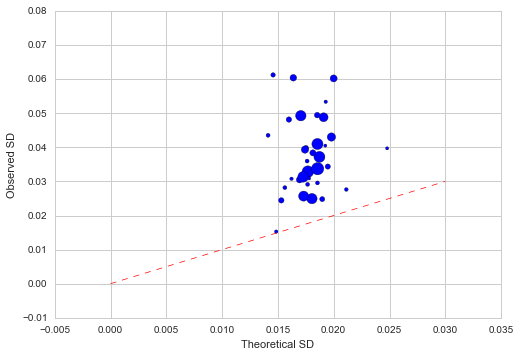

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', context='notebook')
plt.scatter(theory_se, observed_se, s=[i*2 for i in m])
plt.plot((0,0.03), (0,0.03), 'r--', lw=0.7)
plt.xlabel('Theoretical SD')
plt.ylabel('Observed SD')

** Your answer here: **

Observed standard deviations are approximately 2 times more than theoretical ones.

#### Problem 2(d)

Repeat Problem 2(c) but include only the most recent polls from the last two months. Do they match better or worse or the same? Can we just trust the theoretical values?

poll: 2014 Colorado Senate: Gardner vs. Udall, theoretical sd = 0.0179, observed sd = 0.0220
poll: 2014 New Hampshire Senate: Brown vs. Shaheen, theoretical sd = 0.0182, observed sd = 0.0282
poll: 2014 Arkansas Senate: Cotton vs. Pryor, theoretical sd = 0.0180, observed sd = 0.0250
poll: 2014 New Jersey Senate: Bell vs. Booker, theoretical sd = 0.0170, observed sd = 0.0342
poll: 2014 Michigan Senate: Land vs. Peters, theoretical sd = 0.0172, observed sd = 0.0289
poll: 2014 Minnesota Senate: McFadden vs. Franken, theoretical sd = 0.0176, observed sd = 0.0187
poll: 2014 Oklahoma Senate: Lankford vs. Johnson, theoretical sd = 0.0183, observed sd = 0.0313
poll: 2014 Iowa Senate: Ernst vs. Braley, theoretical sd = 0.0174, observed sd = 0.0304
poll: 2014 Texas Senate: Cornyn vs. Alameel, theoretical sd = 0.0137, observed sd = 0.0345
poll: 2014 South Carolina Senate: Scott vs. Dickerson, theoretical sd = 0.0140, observed sd = 0.0179
poll: 2014 South Dakota Senate: Rounds vs. Weiland, theoreti

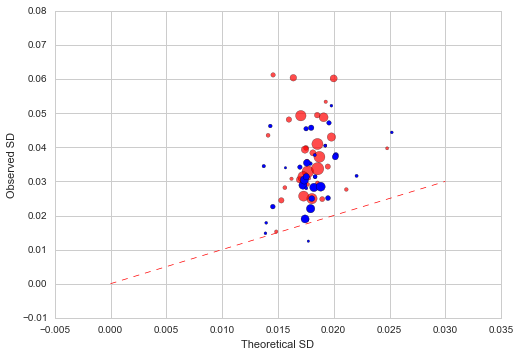

In [342]:
import datetime as dt
theory_se_recent, observed_se_recent, m_recent = [], [], []
for k in list(polls.keys()):
    rep = candidates[candidates.title == k].R.values[0]
    
    df_poll = polls[k]
    df_poll['p'] = df_poll[rep] / 100
    df_poll['p1'] = 1 - df_poll.p
    df_poll['var'] = df_poll.p * df_poll.p1 / df_poll['Number of Observations']
    
    df_poll['Start Date'] = df_poll['Start Date'].apply(pd.to_datetime)
    dt_max = df_poll['Start Date'].max()
    p = df_poll[df_poll['Start Date'] > dt.datetime(dt_max.year, dt_max.month - 2, dt_max.day)]
    M = len(p.index)
    
    se = np.sqrt(p['var'].mean())
    print('poll: %s, theoretical sd = %.4f, observed sd = %.4f' 
          % (k, se, np.std(p[[rep]] / 100).values[0]))    
    theory_se_recent.append(se)
    observed_se_recent.append(np.std(p[[rep]] / 100).values[0])
    m_recent.append(M)

plt.scatter(theory_se, observed_se, c='r', s=[i*2 for i in m], alpha=0.7)
plt.scatter(theory_se_recent, observed_se_recent, c='b', s=[i*2 for i in m_recent])
plt.plot((0,0.03), (0,0.03), 'r--', lw=0.7)
plt.xlabel('Theoretical SD')
plt.ylabel('Observed SD')

** Your answer here: **

Difference between theoretical and observed SDs seems to decrese insignificantly. Standard deviations are likely not determined of time horizons, but connected with other pollsters' aspects.

#### Problem 2(e)

Create a scatter plot with each point representing one state. Is there one or more races that are outlier in that it they have much larger variabilities than expected ? Explore the original poll data and explain why the discrepancy?

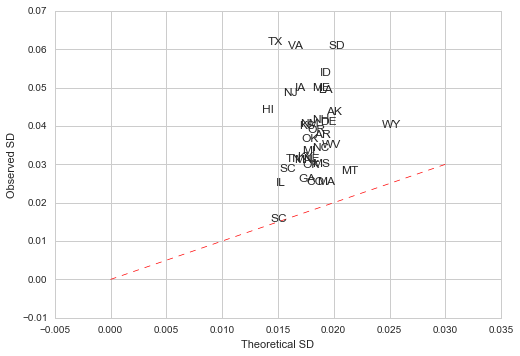

In [383]:
states = []    
plt.scatter(theory_se, observed_se, s=0)
plt.plot((0,0.03), (0,0.03), 'r--', lw=0.7)
plt.xlabel('Theoretical SD')
plt.ylabel('Observed SD')
for i in range(len(theory_se)):
    title = list(polls.keys())[i]
    state = df[df.title == title].state.values[0]
    states.append(state)
    plt.text(theory_se[i]-0.0005, observed_se[i], state)

In [373]:
t = df[df.state == 'TX'].title.values[0]
cols_to_drop = ['End Date', 'Entry Date/Time (ET)', 'Pollster URL', 'Source URL', 'Question Text', 'Question Iteration', 'p', 'p1']
polls[t].drop(cols_to_drop, axis=1)

,Pollster,Start Date,Number of Observations,Population,Mode,Cornyn,Alameel,Other,Undecided,Partisan,Affiliation,var
0,CBS/NYT/YouGov,2014-10-16,3987,Likely Voters,Internet,57,35,1,8,Nonpartisan,None,0.000061
1,YouGov/U of Texas/Texas Tribune,2014-10-10,866,Likely Voters,Internet,57,31,NaN,NaN,Nonpartisan,None,0.000283
2,Rasmussen,2014-10-01,850,Likely Voters,Automated Phone,50,29,6,15,Nonpartisan,None,0.000294
3,CBS/NYT/YouGov,2014-09-20,4177,Likely Voters,Internet,55,35,1,9,Nonpartisan,None,0.000059
4,Texas Lyceum,2014-09-11,666,Likely Voters,Live Phone,48,30,8,14,Nonpartisan,None,0.000375
5,CBS/NYT/YouGov,2014-08-18,4189,Likely Voters,Internet,55,34,3,8,Nonpartisan,None,0.000059
6,Rasmussen,2014-08-04,850,Likely Voters,Automated Phone,47,29,6,19,Nonpartisan,None,0.000293
7,CBS/NYT/YouGov,2014-07-05,4213,Likely Voters,Internet,55,38,3,3,Nonpartisan,None,0.000059
8,YouGov/U of Texas/Texas Tribune,2014-05-30,1200,Registered Voters,Internet,36,25,13,26,Nonpartisan,None,0.000192
9,PPP (D),2014-04-10,559,Likely Voters,Automated Phone,49,32,NaN,20,Pollster,Dem,0.000447


** Your answer here: **

Texas, Virginia and South Dakota hvae much larger standard deviations than expected.

In Texas there were several polls with large number of undecided voters and small number of observations. This leaded to large variance.

#### Problem 2(f)

Construct confidence intervals for the difference in each race. Use either theoretical or data driven estimates of the standard error depending on your answer to this question. Use the results in Problem 2(e), to justify your choice.


99% confident interval = $Mean \pm 2.58\cdot \frac{Var}{\sqrt{n_i}}$

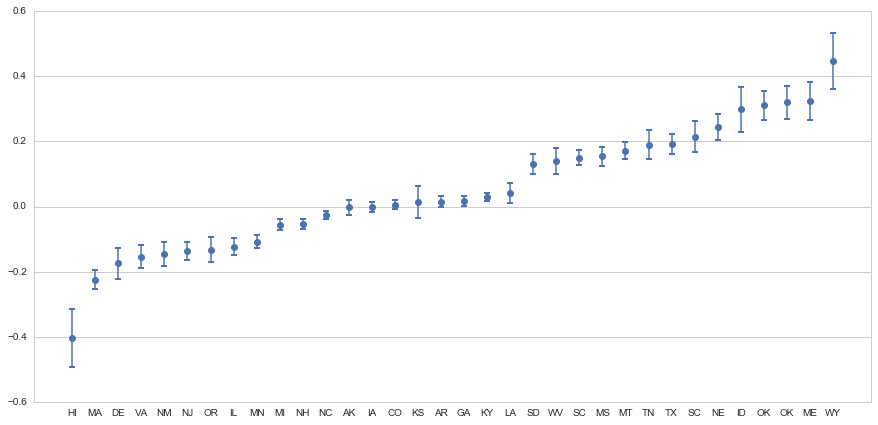

In [442]:
means, se = [], []
for k in list(polls.keys()):
    rep = candidates[candidates.title == k].R.values[0]
    dem = candidates[candidates.title == k].D.values[0]
    
    df_poll = polls[k]
    df_poll['r'] = df_poll[rep] / 100
    df_poll['d'] = df_poll[dem] / 100        
    df_poll['diff'] = df_poll.r - df_poll.d   
    
    mean_obs = np.mean(df_poll['diff'])
    sd_obs = np.std(df_poll['diff']) / np.sqrt(len(df_poll.index))   
    means.append(mean_obs)
    se.append(sd_obs)
    
ci = pd.DataFrame()
ci['state'] = states
ci['means'] = means
ci['stds'] = se
ci = ci.sort_values('means')
plt.figure(figsize=(15, 7))
ax = plt.scatter(np.arange(len(ci.index)), ci.means, s=30)
ax.axes.xaxis.grid(False)
plt.xticks(np.arange(len(ci.index)), ci.state)
plt.errorbar(np.arange(len(ci.index)), ci.means, yerr=[2.58 * i for i in ci.stds.values], lw=1.5,
            fmt='o', capthick=2)
plt.show()

# Problem 3: Prediction and Posterior Probabilities

Perform a Bayesian analysis to predict the probability of Republicans winning in each state then provide a posterior distribution of the number of republicans in the senate.

#### Problem 3(a)

First, we define a Bayesian model for each race. The prior for the difference $\theta$ between republicans and democtrats will be $N(\mu,\tau^2)$. Say before seeing poll data you have no idea who is going to win, what should $\mu$ be? How about $\tau$, should it be large or small? 

** Your answer here: **

#### Problem 3(b)

What is the distribution of $d$ conditioned on $\theta$. What is the posterior distribution of $\theta | d$? 

**Hint**: Use normal approximation. 

**Your answer here:**

#### Problem 3(c)

The prior represents what we think before hand. We do not know who is expected to win, so we assume $\mu=0$. For this problem estimate $\tau$ using the observed differences across states (Hint: $\tau$ represents the standard deviation of a typical difference). Compute the posterior mean for each state and plot it against original average. Is there much change? Why or why not? 

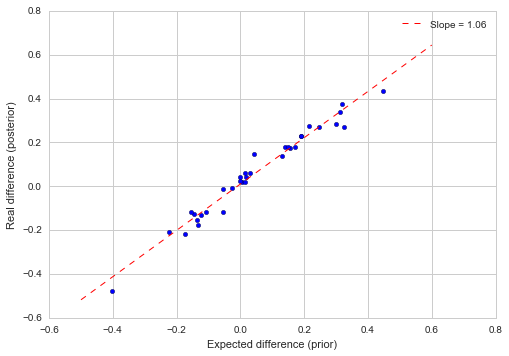

In [489]:
real_dif = []
for t in list(polls.keys()):    
    rep = df[(df.title == t)
            & (df.last_name == candidates[candidates.title == t].R.values[0])].value.values[0]
    dem = df[(df.title == t)
            & (df.last_name == candidates[candidates.title == t].D.values[0])].value.values[0]
    dif = rep - dem
    real_dif.append(dif / 100)
    
plt.scatter(means, real_dif)
plt.xlabel('Expected difference (prior)')
plt.ylabel('Real difference (posterior)')
p = np.poly1d(np.polyfit(means, real_dif, deg=1))
x = np.linspace(-0.5, 0.6, 200)
plt.plot(x, p(x), 'r--', lw=1.0, label='Slope = %.2f' % np.polyfit(means, real_dif, deg=1)[0])
plt.legend(loc='best')


**Your answer here:**

#### Problem 3(d)

For each state, report a probabilty of Republicans winning. How does your answer here compare to the other aggregators?

In [ ]:
### Your code here ###

**Your answer here:**

#### Problem 3(e)

Use the posterior distributions in a Monte Carlo simulation to generate election results. In each simulation compute the total number of seats the Republican control. Show a histogram of these results.

In [ ]:
### Your code here ###

## Problem 4

Predict the results for the 2014 Midterm Elections. We will have a three competitions with the terms for scoring entries described above. For both questions below, **explain** or provide commentary on how you arrived at your predictions including code. 

**Hint**: Use election results from 2010, 2012 to build and test models.

#### Problem 4(a)

Predict the number of Republican senators. You may provide an interval. Smallest interval that includes the election day result wins. 

**Note**: we want the total so add the numbers of those that are not up for election.

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

#### Problem 4(b)

Predict the R-D difference in each state. The predictions that minimize the residual sum of squares between predicted and observed differences wins.

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

#### Problem 4(c)

Report a confidence interval for the R-D difference in each state. If the election day result falls outside your confidence interval in more than two states you are eliminated. For those surviving this cutoff, we will add up the size of all confidence intervals and sum. The smallest total length of confidence interval wins. 

**Note**: you can use Bayesian credible intervals or whatever else you want. 

In [ ]:
### Your code here ###

**Provide an explanation of methodology here**:

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
